In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import ast
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
businesses = pd.read_csv("restaurant.csv", low_memory=False)
print(businesses.shape)

(192609, 54)


The columns that have been marked for removal must now be removed from the data

In [3]:
businesses.head()

,Unnamed: 0,address,business_id,categories,city,hours,is_open,latitude,longitude,name,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
0,0,2818 E Camino Acequia Drive,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,30 Eglinton Avenue W,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,NaN,False,True,2,True,True,True,NaN,NaN,u'no'
2,2,"10110 Johnston Rd, Ste 15",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,...,NaN,False,True,2,True,True,True,NaN,NaN,u'no'
3,3,"15655 W Roosevelt St, Ste 237",xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"4209 Stuart Andrew Blvd, Ste F",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# only keep the columns you are interested.
keeplist = ['is_open','latitude','longitude','review_count','stars','Alcohol','BikeParking','BusinessAcceptsCreditCards','OutdoorSeating','GoodForKids']
df = businesses[keeplist].dropna()

In [5]:
# print the information of the dataset
print(df.info())

# print # of rows, # of columns
print(df.shape)

# print the first five rows
df.head(40)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22970 entries, 2 to 192603
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_open                     22970 non-null  int64  
 1   latitude                    22970 non-null  float64
 2   longitude                   22970 non-null  float64
 3   review_count                22970 non-null  int64  
 4   stars                       22970 non-null  float64
 5   Alcohol                     22970 non-null  object 
 6   BikeParking                 22970 non-null  object 
 7   BusinessAcceptsCreditCards  22970 non-null  object 
 8   OutdoorSeating              22970 non-null  object 
 9   GoodForKids                 22970 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.9+ MB
None
(22970, 10)


,is_open,latitude,longitude,review_count,stars,Alcohol,BikeParking,BusinessAcceptsCreditCards,OutdoorSeating,GoodForKids
2,1,35.092564,-80.859132,170,4.0,u'beer_and_wine',True,True,False,True
12,1,35.527410,-80.868003,9,3.5,'beer_and_wine',True,True,True,False
13,1,41.708520,-81.359556,16,4.0,u'none',True,True,False,True
22,1,36.080168,-115.182756,107,4.0,u'full_bar',False,True,True,False
25,1,36.195615,-115.040529,184,4.5,u'beer_and_wine',True,True,False,True
52,1,33.422164,-111.859035,64,2.5,u'full_bar',True,True,False,False
58,0,35.172028,-80.746801,15,3.0,u'full_bar',False,True,True,False
66,1,40.465694,-79.949324,242,4.5,u'full_bar',True,True,False,False
73,1,40.441062,-80.002126,106,4.5,'none',True,True,False,True
75,0,36.125031,-115.225620,33,2.0,u'none',True,True,False,True


In [6]:
df['Alcohol'].value_counts()

u'none'             7626
u'full_bar'         6788
'none'              3475
u'beer_and_wine'    2183
'full_bar'          1873
'beer_and_wine'     1006
None                  19
Name: Alcohol, dtype: int64

In [7]:
df.loc[df["Alcohol"] == "u'none'", "Alcohol"] = 0 
df.loc[df["Alcohol"] == "'none'", "Alcohol"] = 0
df.loc[df["Alcohol"] == "None", "Alcohol"] = 0

df.loc[df["Alcohol"] == "u'beer_and_wine'", "Alcohol"] = 1
df.loc[df["Alcohol"] == "'beer_and_wine'", "Alcohol"] = 1

df.loc[df["Alcohol"] == "u'full_bar'", "Alcohol"] = 2
df.loc[df["Alcohol"] == "'full_bar'", "Alcohol"] = 2

In [8]:
df['Alcohol'] = df['Alcohol'].astype(int)
df['Alcohol'].value_counts()

0    11120
2     8661
1     3189
Name: Alcohol, dtype: int64

### Clean up other columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22970 entries, 2 to 192603
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_open                     22970 non-null  int64  
 1   latitude                    22970 non-null  float64
 2   longitude                   22970 non-null  float64
 3   review_count                22970 non-null  int64  
 4   stars                       22970 non-null  float64
 5   Alcohol                     22970 non-null  int64  
 6   BikeParking                 22970 non-null  object 
 7   BusinessAcceptsCreditCards  22970 non-null  object 
 8   OutdoorSeating              22970 non-null  object 
 9   GoodForKids                 22970 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.9+ MB


In [10]:
# BikeParking
df['BikeParking'].value_counts()

True     17501
False     5447
None        22
Name: BikeParking, dtype: int64

In [11]:
df.loc[df["BikeParking"] == "True", "BikeParking"] = 1 
df.loc[df["BikeParking"] == "False", "BikeParking"] = 0
df.loc[df["BikeParking"] == "None", "BikeParking"] = 0

df['BikeParking'] = df['BikeParking'].astype(int)
df['BikeParking'].value_counts()

1    17501
0     5469
Name: BikeParking, dtype: int64

In [12]:
# BusinessAcceptsCreditCards
df['BusinessAcceptsCreditCards'].value_counts()

True     22489
False      466
None        15
Name: BusinessAcceptsCreditCards, dtype: int64

In [13]:
df.loc[df["BusinessAcceptsCreditCards"] == "True", "BusinessAcceptsCreditCards"] = 1 
df.loc[df["BusinessAcceptsCreditCards"] == "False", "BusinessAcceptsCreditCards"] = 0
df.loc[df["BusinessAcceptsCreditCards"] == "None", "BusinessAcceptsCreditCards"] = 0

df['BusinessAcceptsCreditCards'] = df['BusinessAcceptsCreditCards'].astype(int)
df['BusinessAcceptsCreditCards'].value_counts()

1    22489
0      481
Name: BusinessAcceptsCreditCards, dtype: int64

In [14]:
print(df['GoodForKids'].value_counts())
df.loc[df["GoodForKids"] == "True", "GoodForKids"] = 1 
df.loc[df["GoodForKids"] == "False", "GoodForKids"] = 0
df.loc[df["GoodForKids"] == "None", "GoodForKids"] = 0

df['GoodForKids'] = df['GoodForKids'].astype(int)
df['GoodForKids'].value_counts()

df.info()

True     19297
False     3668
None         5
Name: GoodForKids, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22970 entries, 2 to 192603
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_open                     22970 non-null  int64  
 1   latitude                    22970 non-null  float64
 2   longitude                   22970 non-null  float64
 3   review_count                22970 non-null  int64  
 4   stars                       22970 non-null  float64
 5   Alcohol                     22970 non-null  int64  
 6   BikeParking                 22970 non-null  int64  
 7   BusinessAcceptsCreditCards  22970 non-null  int64  
 8   OutdoorSeating              22970 non-null  object 
 9   GoodForKids                 22970 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 1.9+ MB


In [15]:
df['OutdoorSeating'].value_counts()

False    12793
True     10160
None        17
Name: OutdoorSeating, dtype: int64

In [16]:
df.loc[df["OutdoorSeating"] == "True", "OutdoorSeating"] = 1 
df.loc[df["OutdoorSeating"] == "False", "OutdoorSeating"] = 0
df.loc[df["OutdoorSeating"] == "None", "OutdoorSeating"] = 0

df['OutdoorSeating'] = df['OutdoorSeating'].astype(int)
df['OutdoorSeating'].value_counts()

0    12810
1    10160
Name: OutdoorSeating, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22970 entries, 2 to 192603
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_open                     22970 non-null  int64  
 1   latitude                    22970 non-null  float64
 2   longitude                   22970 non-null  float64
 3   review_count                22970 non-null  int64  
 4   stars                       22970 non-null  float64
 5   Alcohol                     22970 non-null  int64  
 6   BikeParking                 22970 non-null  int64  
 7   BusinessAcceptsCreditCards  22970 non-null  int64  
 8   OutdoorSeating              22970 non-null  int64  
 9   GoodForKids                 22970 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.9 MB


## Predictive Restaurant’s Longevity (Classification)

In this part, we will build up a classification model, in which 'is_open' is the dependent variable (y).

In [18]:
# define the predictors
x_columns = ['latitude','longitude','review_count','stars','Alcohol','BikeParking','BusinessAcceptsCreditCards','OutdoorSeating','GoodForKids']

1    0.811232
0    0.188768
Name: is_open, dtype: float64

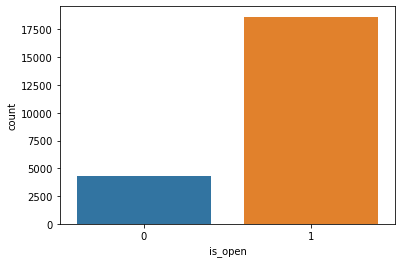

In [19]:
# Plot the distribution of the y variable
sns.countplot(df.is_open, label="Count")
df['is_open'].value_counts(normalize=True)

# SMOTE for Imbalanced Classification

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [20]:
# SMOTE: Synthetic Minority Oversampling Technique (synthesize new examples from the minority class)
from imblearn.over_sampling import (SMOTE)
# sampler = SMOTE(sampling_strategy = 1)
# X_rs, y_rs = sampler.fit_sample(df[x_columns], df['is_open'])

oversample = SMOTE()
X_rs, y_rs = oversample.fit_resample(df[x_columns], df['is_open'])

print('SMOTE {}'.format(Counter(y_rs)))

SMOTE Counter({1: 18634, 0: 18634})


In [21]:
X = pd.DataFrame(X_rs, columns=x_columns)
y = pd.DataFrame(y_rs, columns = ['is_open'])

# combine the columns in X and y to form the new oversampled dataset
df_new = pd.concat([X, y], axis=1)

In [22]:
# Plot the distribution of the y variable
y.value_counts()

is_open
0          18634
1          18634
dtype: int64

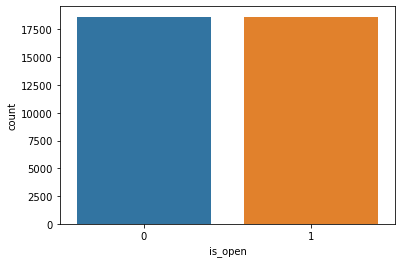

In [23]:
sns.countplot(y.is_open, label="Count")

In [24]:
# split the dataset for cross validation

X_train, X_test, y_train, y_test = train_test_split\
  (X, y, train_size = 0.6, random_state = 1)

### Random Forest Models

In [25]:
#Create a list of random forest Classifier models and print out the accuracy score for each model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

# play around with the setting for max_features
for i in range(1, 10):
    rfc = RandomForestClassifier(max_features=i, random_state=1)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    print("Accuracy for %s feature(s) equals %s" %(i, accuracy_score(y_test, pred)))

Accuracy for 1 feature(s) equals 0.8190904212503354
Accuracy for 2 feature(s) equals 0.8280118057418836
Accuracy for 3 feature(s) equals 0.8346525355513819
Accuracy for 4 feature(s) equals 0.8361953313657097
Accuracy for 5 feature(s) equals 0.8367319559967803
Accuracy for 6 feature(s) equals 0.8331097397370539
Accuracy for 7 feature(s) equals 0.8316340220016099
Accuracy for 8 feature(s) equals 0.8321035685537966
Accuracy for 9 feature(s) equals 0.8302253823450496


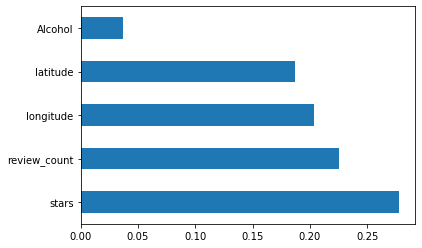

In [28]:
#identify the best random forest model and plot the features importance scores for the best random forest model
#We can see that when the max_features is equal to 5, the accuracy is 0.8367319559967803
rfc1 = RandomForestClassifier(max_features=5, random_state=1)
rfc1.fit(X_train, y_train)
feat_importances = pd.Series(rfc1.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

### PDPBox plots

When using black box machine learning algorithms like random forest, it is hard to understand the relations between predictors and model outcome. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

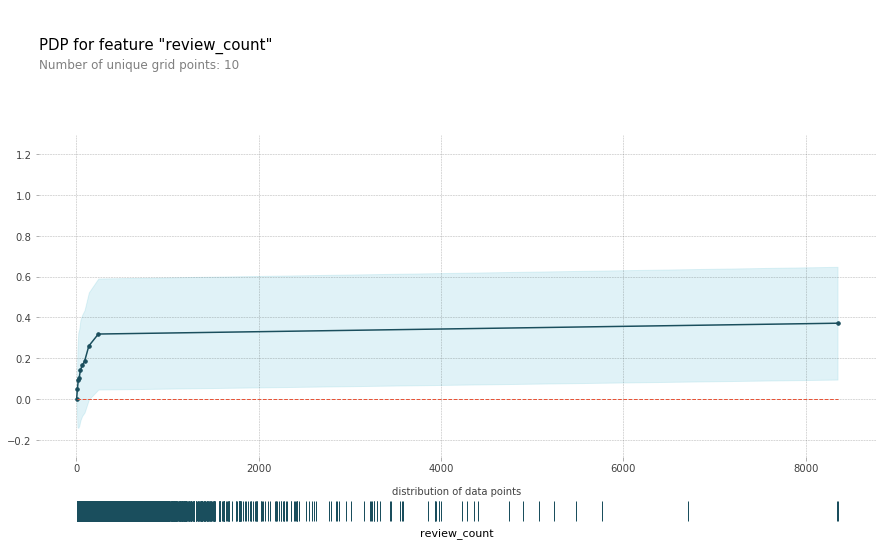

In [30]:
# PDPBox for the impact of review counts on restaurants status

pdp_review_count = pdp_isolate(model=rfc, dataset=df_new, model_features=x_columns,feature='review_count')
fig, axes = pdp_plot(pdp_isolate_out=pdp_review_count,feature_name='review_count',plot_pts_dist=True)

As shown in the plot above, the number of review counts has a positive impact on the likelihood of a restaurant being open. This positive impact is especially when the number of review counts is below 200.

In [31]:
#Use pdpbox plots to explain the impact of 'stars' and 'Alcohol' on 'is_open' separately.
# Also, interpret the pdpbox plots.

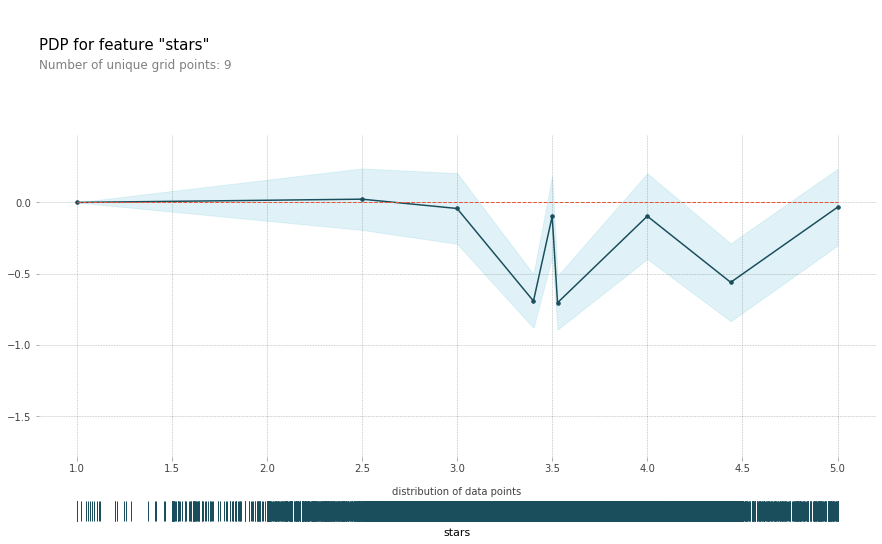

In [32]:
# PDPBox for the impact of stars on restaurants status
pdp_stars = pdp_isolate(model=rfc, dataset=df_new, model_features=x_columns,feature='stars')
fig, axes = pdp_plot(pdp_isolate_out=pdp_stars,feature_name='stars',plot_pts_dist=True)

As shown in the plot above, the number of stars has a negative impact on the likelihood of a restaurant being open. This negative impact is especially when the number of starts is from 3.0 to 3.5, 4.0 to 4.5 .

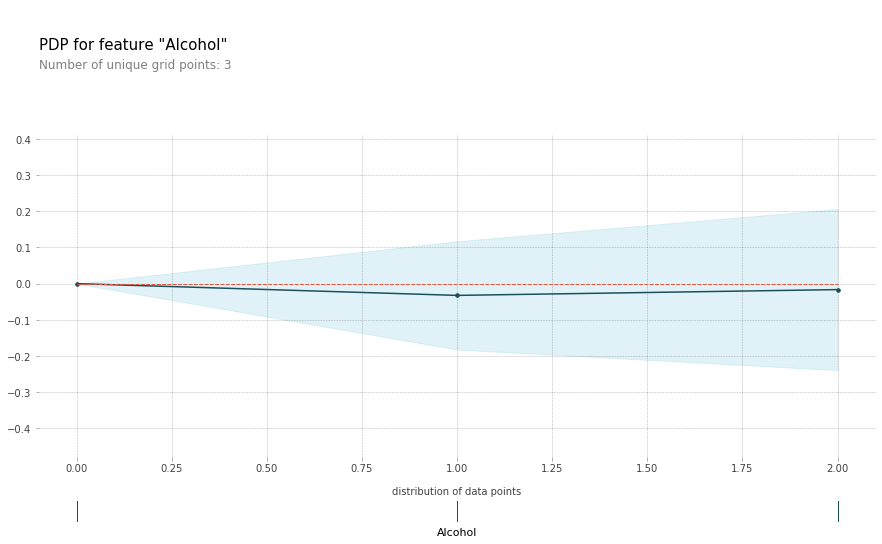

In [33]:
# PDPBox for the impact of Alcohol on restaurants status

pdp_alcohol = pdp_isolate(model=rfc, dataset=df_new, model_features=x_columns,feature='Alcohol')
fig, axes = pdp_plot(pdp_isolate_out=pdp_alcohol,feature_name='Alcohol',plot_pts_dist=True)

As shown in the plot above, the number of Alcohol has a negative impact on the likelihood of a restaurant being open. This negative impact is especially when the number of Alcohol is equal to 1(beer and wine).